### Import libraries

In [89]:
import pprint
import json

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Installing and importing tensorflow_docs 
`pip install git+https://github.com/tensorflow/docs`

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

In [3]:
keras.__version__

'2.2.4-tf'

### Loading dataset
#### Medical Cost Personal Datasets
Source: https://www.kaggle.com/mirichoi0218/insurance

Datafields:

* age: age of primary beneficiary 

* sex: insurance contractor gender (female, male)

* bmi: Body mass index, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

In [4]:
data = pd.read_csv('datasets/insurance.csv')

data.sample(10)

,age,sex,bmi,children,smoker,region,charges
899,19,female,22.515,0,no,northwest,2117.33885
714,24,female,22.600,0,no,southwest,2457.50200
648,18,male,28.500,0,no,northeast,1712.22700
433,60,female,30.500,0,no,southwest,12638.19500
785,35,female,27.700,3,no,southwest,6414.17800
875,23,female,28.120,0,no,northwest,2690.11380
37,26,male,20.800,0,no,southwest,2302.30000
437,35,male,28.900,3,no,southwest,5926.84600
703,34,female,26.410,1,no,northwest,5385.33790
374,20,male,33.330,0,no,southeast,1391.52870


In [5]:
data.shape

(1338, 7)

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [8]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Visualizing Dataset

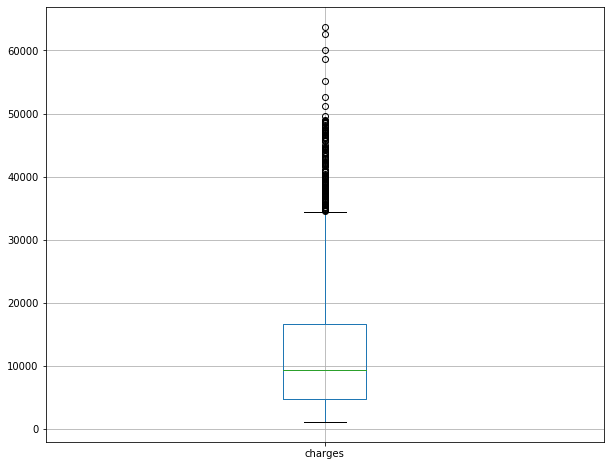

In [75]:
plt.figure(figsize=(10, 8))

data.boxplot('charges')

plt.show()

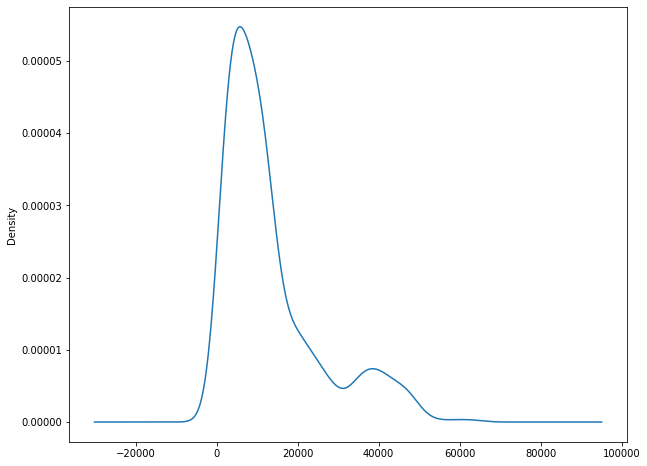

In [76]:
plt.figure(figsize=(10, 8))

data['charges'].plot.kde()

plt.show()

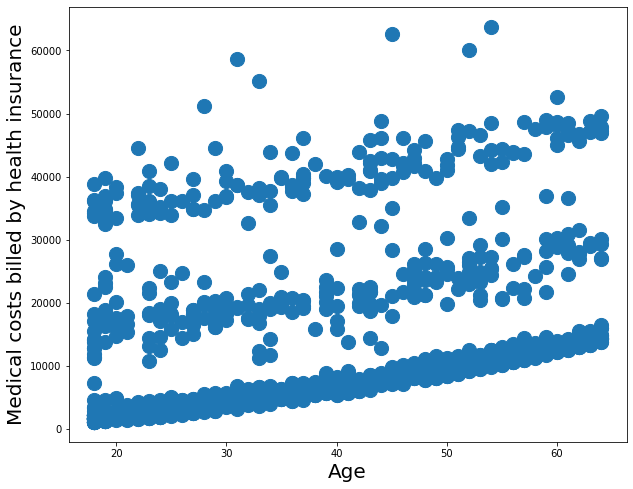

In [77]:
plt.figure(figsize=(10, 8))

plt.scatter(data['age'], data['charges'], s=200)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

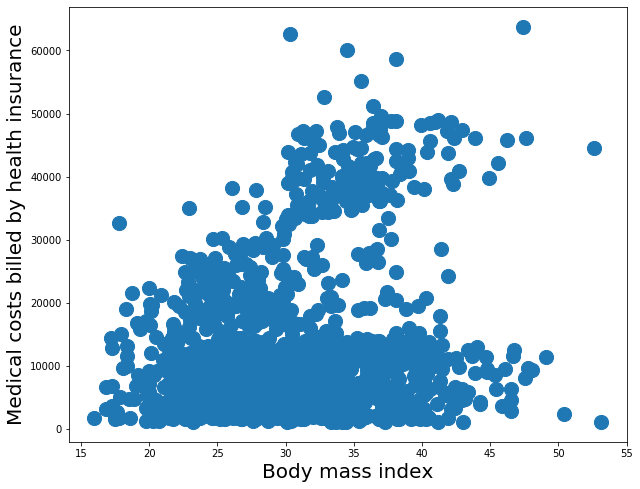

In [78]:
plt.figure(figsize=(10, 8))

plt.scatter(data['bmi'], data['charges'], s=200)

plt.xlabel('Body mass index', fontsize=20)
plt.ylabel('Medical costs billed by health insurance', fontsize=20)
plt.show()

In [15]:
data_corr = data.corr()

data_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


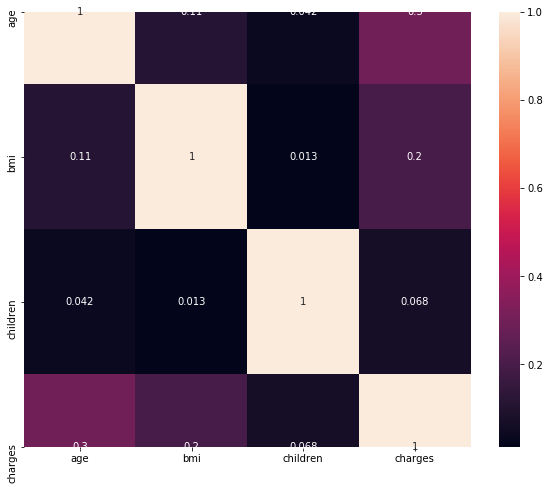

In [79]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_corr, annot=True)

plt.show()

In [80]:
features = data.drop('charges', axis=1)

target = data[['charges']]

In [18]:
features.sample(10)

,age,sex,bmi,children,smoker,region
326,27,female,23.21,1,no,southeast
37,26,male,20.80,0,no,southwest
121,18,male,23.75,0,no,northeast
866,18,male,37.29,0,no,southeast
927,57,female,20.10,1,no,southwest
873,43,male,30.10,1,no,southwest
660,37,male,46.53,3,no,southeast
663,18,male,33.66,0,no,southeast
1121,46,male,38.17,2,no,southeast
670,30,male,31.57,3,no,southeast


In [19]:
target.sample(10)

,charges
1299,2710.82855
844,10072.05505
805,7731.85785
776,6986.69700
192,2137.65360
1211,23563.01618
1041,1704.70015
1310,6940.90985
187,5325.65100
52,23568.27200


In [20]:
categorical_features = features[['sex', 'smoker', 'region']].copy()

categorical_features.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [21]:
numeric_features = features.drop(['sex', 'smoker', 'region'], axis=1)

numeric_features.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


In [22]:
gender_dict = {'female':0, 'male':1}

categorical_features['sex'].replace(gender_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,yes,southwest
1,1,no,southeast
2,1,no,southeast
3,1,no,northwest
4,1,no,northwest


In [23]:
smoker_dict = {'no':0, 'yes':1}

categorical_features['smoker'].replace(smoker_dict, inplace=True)

categorical_features.head()

,sex,smoker,region
0,0,1,southwest
1,1,0,southeast
2,1,0,southeast
3,1,0,northwest
4,1,0,northwest


In [24]:
categorical_features = pd.get_dummies(categorical_features, columns=['region'])

categorical_features.head()

,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0,0,0,1
1,1,0,0,0,1,0
2,1,0,0,0,1,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0


In [25]:
numeric_features.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


In [26]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features), 
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,bmi,children
count,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.853691e-16,-1.869041e-16,2.721623e-17
std,1.000374e+00,1.000374e+00,1.000374e+00
min,-1.509965e+00,-2.412011e+00,-9.086137e-01
25%,-8.691547e-01,-7.164063e-01,-9.086137e-01
50%,-1.474046e-02,-4.320880e-02,-7.876719e-02
75%,8.396738e-01,6.611572e-01,7.510793e-01
max,1.765289e+00,3.685522e+00,3.240619e+00


In [27]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0


In [28]:
processed_features.shape

(1338, 9)

In [29]:
target.head(10)

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
6,8240.58960
7,7281.50560
8,6406.41070
9,28923.13692


In [30]:
processed_data = pd.concat([processed_features, target], axis=1,
                            sort=False)

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [31]:
processed_data.to_csv('datasets/insurance_processed.csv', index=False)

### Splitting dataset into training and testing data

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [33]:
x_train.shape

(1070, 9)

In [34]:
x_test.shape

(268, 9)

### Building model with relu activation function

In [35]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [36]:
model_relu_64 = build_model()

model_relu_64.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


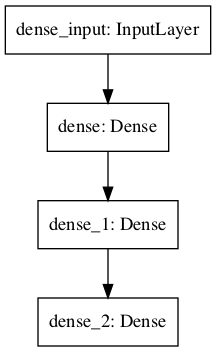

In [37]:
keras.utils.plot_model(model_relu_64, 'model_relu_64.png')

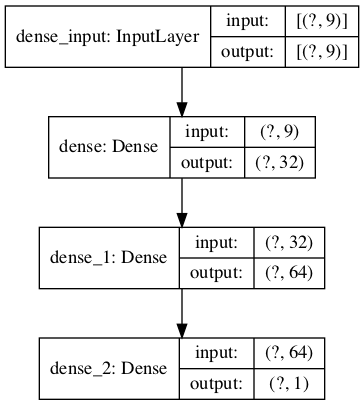

In [38]:
keras.utils.plot_model(model_relu_64, 'model_relu_64_shapes.png', show_shapes=True)

In [72]:
!ls *.png

model_elu_64_shapes.png  model_relu_64.png        model_relu_64_shapes.png


### Training model

In [40]:
n_epochs = 1000

training_hist = model_relu_64.fit(x_train, 
                                  y_train,
                                  epochs = n_epochs, 
                                  validation_split = 0.2, 
                                  verbose = True)

Train on 856 samples, validate on 214 samples
Epoch 1/1000
856/856 [==============================] - 1s 1ms/sample - loss: 317061214.2056 - mae: 13317.7520 - mse: 317061184.0000 - val_loss: 336106600.0748 - val_mae: 12876.9707 - val_mse: 336106592.0000
Epoch 2/1000
856/856 [==============================] - 0s 214us/sample - loss: 317012036.1869 - mae: 13316.0371 - mse: 317012032.0000 - val_loss: 336035280.1495 - val_mae: 12874.4404 - val_mse: 336035264.0000
Epoch 3/1000
856/856 [==============================] - 0s 182us/sample - loss: 316906319.8505 - mae: 13312.3682 - mse: 316906272.0000 - val_loss: 335875305.2710 - val_mae: 12868.9180 - val_mse: 335875328.0000
Epoch 4/1000
856/856 [==============================] - 0s 108us/sample - loss: 316680092.4112 - mae: 13304.7461 - mse: 316680064.0000 - val_loss: 335551700.9346 - val_mae: 12857.9277 - val_mse: 335551680.0000
Epoch 5/1000
856/856 [==============================] - 0s 193us/sample - loss: 316248385.4953 - mae: 13290.2979 - m

Epoch 40/1000
856/856 [==============================] - 0s 132us/sample - loss: 94157403.7757 - mae: 7112.9224 - mse: 94157392.0000 - val_loss: 107056560.5981 - val_mae: 7770.3491 - val_mse: 107056560.0000
Epoch 41/1000
856/856 [==============================] - 0s 152us/sample - loss: 92874937.7944 - mae: 7131.3608 - mse: 92874928.0000 - val_loss: 106081792.4486 - val_mae: 7800.7095 - val_mse: 106081784.0000
Epoch 42/1000
856/856 [==============================] - 0s 130us/sample - loss: 91796456.1495 - mae: 7148.2114 - mse: 91796440.0000 - val_loss: 105115684.7850 - val_mae: 7827.9668 - val_mse: 105115688.0000
Epoch 43/1000
856/856 [==============================] - 0s 151us/sample - loss: 90857539.1402 - mae: 7177.6631 - mse: 90857552.0000 - val_loss: 104243620.4860 - val_mae: 7861.5269 - val_mse: 104243624.0000
Epoch 44/1000
856/856 [==============================] - 0s 162us/sample - loss: 89912807.7009 - mae: 7173.6045 - mse: 89912808.0000 - val_loss: 103404817.4953 - val_mae: 7

Epoch 80/1000
856/856 [==============================] - 0s 224us/sample - loss: 64171000.7850 - mae: 6211.5972 - mse: 64171000.0000 - val_loss: 74113223.3271 - val_mae: 6759.1646 - val_mse: 74113224.0000
Epoch 81/1000
856/856 [==============================] - 0s 196us/sample - loss: 63526041.4206 - mae: 6204.3506 - mse: 63526040.0000 - val_loss: 73331462.7290 - val_mae: 6750.7822 - val_mse: 73331464.0000
Epoch 82/1000
856/856 [==============================] - 0s 212us/sample - loss: 62772389.0841 - mae: 6164.0259 - mse: 62772388.0000 - val_loss: 72488765.0093 - val_mae: 6697.7388 - val_mse: 72488760.0000
Epoch 83/1000
856/856 [==============================] - 0s 221us/sample - loss: 62103655.4019 - mae: 6102.3115 - mse: 62103648.0000 - val_loss: 71669992.6729 - val_mae: 6629.9697 - val_mse: 71669992.0000
Epoch 84/1000
856/856 [==============================] - 0s 184us/sample - loss: 61425641.9065 - mae: 6078.1567 - mse: 61425644.0000 - val_loss: 70848726.2804 - val_mae: 6611.1675 

Epoch 120/1000
856/856 [==============================] - 0s 145us/sample - loss: 41842964.7850 - mae: 4982.0386 - mse: 41842960.0000 - val_loss: 45119073.5701 - val_mae: 5086.2012 - val_mse: 45119072.0000
Epoch 121/1000
856/856 [==============================] - 0s 124us/sample - loss: 41514785.9065 - mae: 4931.3037 - mse: 41514788.0000 - val_loss: 44640710.1308 - val_mae: 5036.0933 - val_mse: 44640712.0000
Epoch 122/1000
856/856 [==============================] - 0s 143us/sample - loss: 41197288.4860 - mae: 4898.6792 - mse: 41197292.0000 - val_loss: 44198785.2710 - val_mae: 4994.1660 - val_mse: 44198784.0000
Epoch 123/1000
856/856 [==============================] - 0s 146us/sample - loss: 40930778.4673 - mae: 4905.7915 - mse: 40930776.0000 - val_loss: 43710313.6449 - val_mae: 4983.6777 - val_mse: 43710316.0000
Epoch 124/1000
856/856 [==============================] - 0s 128us/sample - loss: 40593792.4860 - mae: 4876.7852 - mse: 40593796.0000 - val_loss: 43255665.1215 - val_mae: 4929.

Epoch 160/1000
856/856 [==============================] - 0s 138us/sample - loss: 36350905.5327 - mae: 4257.2451 - mse: 36350908.0000 - val_loss: 35291045.4579 - val_mae: 4051.7236 - val_mse: 35291044.0000
Epoch 161/1000
856/856 [==============================] - 0s 122us/sample - loss: 36327705.1589 - mae: 4253.8994 - mse: 36327708.0000 - val_loss: 35199137.5701 - val_mae: 4053.5537 - val_mse: 35199136.0000
Epoch 162/1000
856/856 [==============================] - 0s 123us/sample - loss: 36286441.7196 - mae: 4249.5454 - mse: 36286444.0000 - val_loss: 35129809.4206 - val_mae: 4034.4609 - val_mse: 35129804.0000
Epoch 163/1000
856/856 [==============================] - 0s 109us/sample - loss: 36252843.4579 - mae: 4240.6157 - mse: 36252840.0000 - val_loss: 35048803.3645 - val_mae: 4026.3381 - val_mse: 35048804.0000
Epoch 164/1000
856/856 [==============================] - 0s 112us/sample - loss: 36216271.6822 - mae: 4224.9995 - mse: 36216276.0000 - val_loss: 34982250.2430 - val_mae: 4012.

Epoch 200/1000
856/856 [==============================] - 0s 98us/sample - loss: 35466941.1776 - mae: 4093.4990 - mse: 35466940.0000 - val_loss: 33363218.6168 - val_mae: 3840.6355 - val_mse: 33363216.0000
Epoch 201/1000
856/856 [==============================] - 0s 93us/sample - loss: 35452734.2617 - mae: 4086.4661 - mse: 35452736.0000 - val_loss: 33326657.8692 - val_mae: 3843.8904 - val_mse: 33326658.0000
Epoch 202/1000
856/856 [==============================] - 0s 103us/sample - loss: 35432658.9533 - mae: 4088.9727 - mse: 35432660.0000 - val_loss: 33320216.3738 - val_mae: 3842.1467 - val_mse: 33320218.0000
Epoch 203/1000
856/856 [==============================] - 0s 97us/sample - loss: 35411234.4673 - mae: 4093.2571 - mse: 35411232.0000 - val_loss: 33307718.5047 - val_mae: 3845.4346 - val_mse: 33307720.0000
Epoch 204/1000
856/856 [==============================] - 0s 103us/sample - loss: 35380761.7383 - mae: 4088.7241 - mse: 35380756.0000 - val_loss: 33240882.5421 - val_mae: 3841.226

Epoch 240/1000
856/856 [==============================] - 0s 97us/sample - loss: 34605783.1776 - mae: 4021.8347 - mse: 34605788.0000 - val_loss: 32262876.1121 - val_mae: 3775.0420 - val_mse: 32262876.0000
Epoch 241/1000
856/856 [==============================] - 0s 99us/sample - loss: 34585163.3458 - mae: 4018.6741 - mse: 34585168.0000 - val_loss: 32245428.1869 - val_mae: 3785.2617 - val_mse: 32245430.0000
Epoch 242/1000
856/856 [==============================] - 0s 107us/sample - loss: 34578533.4579 - mae: 4016.5525 - mse: 34578536.0000 - val_loss: 32238004.4112 - val_mae: 3771.7219 - val_mse: 32238008.0000
Epoch 243/1000
856/856 [==============================] - 0s 89us/sample - loss: 34559639.3832 - mae: 4025.5088 - mse: 34559640.0000 - val_loss: 32175613.9065 - val_mae: 3781.0222 - val_mse: 32175616.0000
Epoch 244/1000
856/856 [==============================] - 0s 103us/sample - loss: 34516136.6729 - mae: 4024.8948 - mse: 34516136.0000 - val_loss: 32147497.9439 - val_mae: 3778.097

Epoch 280/1000
856/856 [==============================] - 0s 102us/sample - loss: 33573361.6636 - mae: 3943.2639 - mse: 33573360.0000 - val_loss: 31288936.2991 - val_mae: 3713.3511 - val_mse: 31288938.0000
Epoch 281/1000
856/856 [==============================] - 0s 99us/sample - loss: 33560976.1121 - mae: 3935.8611 - mse: 33560976.0000 - val_loss: 31242895.1776 - val_mae: 3711.4082 - val_mse: 31242896.0000
Epoch 282/1000
856/856 [==============================] - 0s 103us/sample - loss: 33510958.3551 - mae: 3933.7930 - mse: 33510960.0000 - val_loss: 31239801.0467 - val_mae: 3704.0591 - val_mse: 31239802.0000
Epoch 283/1000
856/856 [==============================] - 0s 103us/sample - loss: 33499121.4579 - mae: 3928.9761 - mse: 33499124.0000 - val_loss: 31216366.2056 - val_mae: 3700.9924 - val_mse: 31216368.0000
Epoch 284/1000
856/856 [==============================] - 0s 100us/sample - loss: 33455612.5047 - mae: 3922.6890 - mse: 33455614.0000 - val_loss: 31178176.5981 - val_mae: 3695.0

Epoch 320/1000
856/856 [==============================] - 0s 112us/sample - loss: 32188115.1776 - mae: 3809.4485 - mse: 32188114.0000 - val_loss: 30157556.2617 - val_mae: 3597.7043 - val_mse: 30157558.0000
Epoch 321/1000
856/856 [==============================] - 0s 111us/sample - loss: 32158342.3738 - mae: 3817.4614 - mse: 32158340.0000 - val_loss: 30143376.1495 - val_mae: 3604.5134 - val_mse: 30143376.0000
Epoch 322/1000
856/856 [==============================] - 0s 102us/sample - loss: 32139405.1215 - mae: 3801.1775 - mse: 32139406.0000 - val_loss: 30106898.1682 - val_mae: 3583.5386 - val_mse: 30106900.0000
Epoch 323/1000
856/856 [==============================] - 0s 104us/sample - loss: 32097558.5607 - mae: 3806.7439 - mse: 32097562.0000 - val_loss: 30053774.8037 - val_mae: 3591.9919 - val_mse: 30053776.0000
Epoch 324/1000
856/856 [==============================] - 0s 108us/sample - loss: 32072857.1776 - mae: 3799.1924 - mse: 32072854.0000 - val_loss: 30035525.6075 - val_mae: 3586.

Epoch 360/1000
856/856 [==============================] - 0s 88us/sample - loss: 30397094.9907 - mae: 3629.1013 - mse: 30397096.0000 - val_loss: 28859902.4299 - val_mae: 3437.7651 - val_mse: 28859904.0000
Epoch 361/1000
856/856 [==============================] - 0s 82us/sample - loss: 30336639.8131 - mae: 3626.6775 - mse: 30336642.0000 - val_loss: 28837472.2243 - val_mae: 3432.5876 - val_mse: 28837472.0000
Epoch 362/1000
856/856 [==============================] - 0s 97us/sample - loss: 30313262.2056 - mae: 3619.2158 - mse: 30313262.0000 - val_loss: 28824792.2991 - val_mae: 3432.9031 - val_mse: 28824792.0000
Epoch 363/1000
856/856 [==============================] - 0s 95us/sample - loss: 30258098.9533 - mae: 3623.7808 - mse: 30258098.0000 - val_loss: 28770420.9346 - val_mae: 3420.9697 - val_mse: 28770422.0000
Epoch 364/1000
856/856 [==============================] - 0s 96us/sample - loss: 30216890.0561 - mae: 3617.0750 - mse: 30216894.0000 - val_loss: 28725305.3458 - val_mae: 3426.4854 

Epoch 400/1000
856/856 [==============================] - 0s 96us/sample - loss: 28348812.8037 - mae: 3426.3376 - mse: 28348818.0000 - val_loss: 27364525.5327 - val_mae: 3254.7744 - val_mse: 27364524.0000
Epoch 401/1000
856/856 [==============================] - 0s 93us/sample - loss: 28285753.2430 - mae: 3421.7026 - mse: 28285756.0000 - val_loss: 27327206.6542 - val_mae: 3250.8130 - val_mse: 27327206.0000
Epoch 402/1000
856/856 [==============================] - 0s 102us/sample - loss: 28239965.3084 - mae: 3430.7158 - mse: 28239966.0000 - val_loss: 27271564.1121 - val_mae: 3249.8030 - val_mse: 27271566.0000
Epoch 403/1000
856/856 [==============================] - 0s 98us/sample - loss: 28180934.4299 - mae: 3403.3933 - mse: 28180940.0000 - val_loss: 27219213.0841 - val_mae: 3228.9812 - val_mse: 27219212.0000
Epoch 404/1000
856/856 [==============================] - 0s 95us/sample - loss: 28122447.2150 - mae: 3413.8540 - mse: 28122446.0000 - val_loss: 27191756.4112 - val_mae: 3241.2769

Epoch 440/1000
856/856 [==============================] - 0s 105us/sample - loss: 26283608.6636 - mae: 3260.0764 - mse: 26283608.0000 - val_loss: 25777216.3738 - val_mae: 3099.0020 - val_mse: 25777216.0000
Epoch 441/1000
856/856 [==============================] - 0s 108us/sample - loss: 26226879.0841 - mae: 3253.3789 - mse: 26226880.0000 - val_loss: 25715217.4953 - val_mae: 3083.5686 - val_mse: 25715220.0000
Epoch 442/1000
856/856 [==============================] - 0s 188us/sample - loss: 26184155.4579 - mae: 3230.1038 - mse: 26184156.0000 - val_loss: 25688571.5140 - val_mae: 3074.0576 - val_mse: 25688572.0000
Epoch 443/1000
856/856 [==============================] - 0s 242us/sample - loss: 26140494.6168 - mae: 3211.8037 - mse: 26140492.0000 - val_loss: 25607370.9907 - val_mae: 3051.6531 - val_mse: 25607368.0000
Epoch 444/1000
856/856 [==============================] - 0s 212us/sample - loss: 26078959.1402 - mae: 3215.4102 - mse: 26078960.0000 - val_loss: 25603390.1308 - val_mae: 3071.

Epoch 480/1000
856/856 [==============================] - 0s 105us/sample - loss: 24527050.4579 - mae: 3072.5212 - mse: 24527048.0000 - val_loss: 24341540.1869 - val_mae: 2901.2688 - val_mse: 24341540.0000
Epoch 481/1000
856/856 [==============================] - 0s 105us/sample - loss: 24476497.6636 - mae: 3074.7244 - mse: 24476494.0000 - val_loss: 24346088.4486 - val_mae: 2916.1880 - val_mse: 24346088.0000
Epoch 482/1000
856/856 [==============================] - 0s 113us/sample - loss: 24436718.5234 - mae: 3074.8655 - mse: 24436722.0000 - val_loss: 24280374.4299 - val_mae: 2901.4714 - val_mse: 24280376.0000
Epoch 483/1000
856/856 [==============================] - 0s 92us/sample - loss: 24400599.7196 - mae: 3067.9438 - mse: 24400600.0000 - val_loss: 24235708.8598 - val_mae: 2891.6851 - val_mse: 24235710.0000
Epoch 484/1000
856/856 [==============================] - 0s 106us/sample - loss: 24376185.8037 - mae: 3041.3640 - mse: 24376186.0000 - val_loss: 24186805.8318 - val_mae: 2877.6

Epoch 520/1000
856/856 [==============================] - 0s 150us/sample - loss: 23257530.4673 - mae: 2933.9802 - mse: 23257528.0000 - val_loss: 23309087.1776 - val_mae: 2773.0444 - val_mse: 23309088.0000
Epoch 521/1000
856/856 [==============================] - 0s 147us/sample - loss: 23211648.9907 - mae: 2954.5881 - mse: 23211646.0000 - val_loss: 23382615.4019 - val_mae: 2806.6506 - val_mse: 23382616.0000
Epoch 522/1000
856/856 [==============================] - 0s 161us/sample - loss: 23195542.6822 - mae: 2948.6604 - mse: 23195542.0000 - val_loss: 23359680.1495 - val_mae: 2799.9021 - val_mse: 23359682.0000
Epoch 523/1000
856/856 [==============================] - 0s 128us/sample - loss: 23162721.1986 - mae: 2942.6851 - mse: 23162722.0000 - val_loss: 23311333.9065 - val_mae: 2790.6331 - val_mse: 23311334.0000
Epoch 524/1000
856/856 [==============================] - 0s 112us/sample - loss: 23143068.2243 - mae: 2918.6162 - mse: 23143068.0000 - val_loss: 23253743.4019 - val_mae: 2760.

Epoch 560/1000
856/856 [==============================] - 0s 133us/sample - loss: 22401450.6636 - mae: 2872.7153 - mse: 22401450.0000 - val_loss: 22820030.7290 - val_mae: 2754.8704 - val_mse: 22820032.0000
Epoch 561/1000
856/856 [==============================] - 0s 98us/sample - loss: 22386621.5514 - mae: 2849.8618 - mse: 22386622.0000 - val_loss: 22777691.4393 - val_mae: 2736.4592 - val_mse: 22777690.0000
Epoch 562/1000
856/856 [==============================] - 0s 109us/sample - loss: 22375648.1776 - mae: 2872.0259 - mse: 22375648.0000 - val_loss: 22805999.4766 - val_mae: 2756.6052 - val_mse: 22806000.0000
Epoch 563/1000
856/856 [==============================] - 0s 96us/sample - loss: 22365476.1028 - mae: 2845.5579 - mse: 22365476.0000 - val_loss: 22765646.4299 - val_mae: 2737.9060 - val_mse: 22765644.0000
Epoch 564/1000
856/856 [==============================] - 0s 108us/sample - loss: 22323473.7944 - mae: 2851.2874 - mse: 22323476.0000 - val_loss: 22764258.4673 - val_mae: 2738.58

Epoch 600/1000
856/856 [==============================] - 0s 97us/sample - loss: 21842328.7196 - mae: 2823.2920 - mse: 21842326.0000 - val_loss: 22512760.0748 - val_mae: 2743.6846 - val_mse: 22512760.0000
Epoch 601/1000
856/856 [==============================] - 0s 92us/sample - loss: 21824399.5327 - mae: 2825.1995 - mse: 21824400.0000 - val_loss: 22497119.0280 - val_mae: 2734.4512 - val_mse: 22497118.0000
Epoch 602/1000
856/856 [==============================] - 0s 94us/sample - loss: 21819527.1402 - mae: 2798.5955 - mse: 21819528.0000 - val_loss: 22442147.8131 - val_mae: 2710.7405 - val_mse: 22442150.0000
Epoch 603/1000
856/856 [==============================] - 0s 97us/sample - loss: 21798313.1402 - mae: 2807.7817 - mse: 21798314.0000 - val_loss: 22489584.5981 - val_mae: 2732.9307 - val_mse: 22489584.0000
Epoch 604/1000
856/856 [==============================] - 0s 109us/sample - loss: 21787644.3832 - mae: 2806.4319 - mse: 21787644.0000 - val_loss: 22462439.2523 - val_mae: 2724.0862

Epoch 640/1000
856/856 [==============================] - 0s 101us/sample - loss: 21459592.4019 - mae: 2766.4258 - mse: 21459594.0000 - val_loss: 22244061.9065 - val_mae: 2697.9761 - val_mse: 22244062.0000
Epoch 641/1000
856/856 [==============================] - 0s 96us/sample - loss: 21462486.0748 - mae: 2743.3472 - mse: 21462488.0000 - val_loss: 22230237.7570 - val_mae: 2695.0303 - val_mse: 22230236.0000
Epoch 642/1000
856/856 [==============================] - 0s 91us/sample - loss: 21456298.2617 - mae: 2801.3923 - mse: 21456298.0000 - val_loss: 22300807.9252 - val_mae: 2726.6685 - val_mse: 22300806.0000
Epoch 643/1000
856/856 [==============================] - 0s 102us/sample - loss: 21428128.7570 - mae: 2792.7510 - mse: 21428130.0000 - val_loss: 22272469.6075 - val_mae: 2719.3230 - val_mse: 22272468.0000
Epoch 644/1000
856/856 [==============================] - 0s 98us/sample - loss: 21452662.2243 - mae: 2741.5747 - mse: 21452662.0000 - val_loss: 22185405.7570 - val_mae: 2678.888

Epoch 680/1000
856/856 [==============================] - 0s 107us/sample - loss: 21170128.2570 - mae: 2748.6208 - mse: 21170128.0000 - val_loss: 22093236.7850 - val_mae: 2704.4297 - val_mse: 22093236.0000
Epoch 681/1000
856/856 [==============================] - 0s 94us/sample - loss: 21178874.9907 - mae: 2730.0125 - mse: 21178872.0000 - val_loss: 22069228.6355 - val_mae: 2690.4839 - val_mse: 22069228.0000
Epoch 682/1000
856/856 [==============================] - 0s 97us/sample - loss: 21150116.9346 - mae: 2752.4348 - mse: 21150114.0000 - val_loss: 22097381.6075 - val_mae: 2709.5430 - val_mse: 22097382.0000
Epoch 683/1000
856/856 [==============================] - 0s 86us/sample - loss: 21161149.5678 - mae: 2747.7131 - mse: 21161152.0000 - val_loss: 22086641.1963 - val_mae: 2704.2097 - val_mse: 22086640.0000
Epoch 684/1000
856/856 [==============================] - 0s 87us/sample - loss: 21138266.8972 - mae: 2746.9863 - mse: 21138266.0000 - val_loss: 22025416.7477 - val_mae: 2679.7473

856/856 [==============================] - 0s 85us/sample - loss: 20972652.0561 - mae: 2725.4578 - mse: 20972650.0000 - val_loss: 21862429.8318 - val_mae: 2656.4172 - val_mse: 21862428.0000
Epoch 720/1000
856/856 [==============================] - 0s 101us/sample - loss: 20958830.2523 - mae: 2696.9807 - mse: 20958832.0000 - val_loss: 21901069.0841 - val_mae: 2669.3650 - val_mse: 21901070.0000
Epoch 721/1000
856/856 [==============================] - 0s 99us/sample - loss: 20959849.5140 - mae: 2708.6089 - mse: 20959850.0000 - val_loss: 21927648.0000 - val_mae: 2684.3342 - val_mse: 21927648.0000
Epoch 722/1000
856/856 [==============================] - 0s 100us/sample - loss: 20973293.9813 - mae: 2757.8254 - mse: 20973296.0000 - val_loss: 22001456.9720 - val_mae: 2708.5120 - val_mse: 22001456.0000
Epoch 723/1000
856/856 [==============================] - 0s 105us/sample - loss: 20958304.5981 - mae: 2717.5518 - mse: 20958306.0000 - val_loss: 21872266.7664 - val_mae: 2665.6775 - val_mse: 2

Epoch 759/1000
856/856 [==============================] - 0s 93us/sample - loss: 20821821.2336 - mae: 2738.2021 - mse: 20821822.0000 - val_loss: 21917206.3551 - val_mae: 2702.9678 - val_mse: 21917206.0000
Epoch 760/1000
856/856 [==============================] - 0s 104us/sample - loss: 20785016.7664 - mae: 2680.7546 - mse: 20785016.0000 - val_loss: 21750943.1028 - val_mae: 2638.0154 - val_mse: 21750942.0000
Epoch 761/1000
856/856 [==============================] - 0s 94us/sample - loss: 20793081.9626 - mae: 2692.4490 - mse: 20793080.0000 - val_loss: 21911695.9252 - val_mae: 2699.8113 - val_mse: 21911696.0000
Epoch 762/1000
856/856 [==============================] - 0s 97us/sample - loss: 20790249.3645 - mae: 2727.7234 - mse: 20790248.0000 - val_loss: 21900478.3551 - val_mae: 2697.9016 - val_mse: 21900478.0000
Epoch 763/1000
856/856 [==============================] - 0s 101us/sample - loss: 20777885.7477 - mae: 2737.3882 - mse: 20777886.0000 - val_loss: 21856505.1963 - val_mae: 2680.334

Epoch 799/1000
856/856 [==============================] - 0s 89us/sample - loss: 20659052.9439 - mae: 2730.8721 - mse: 20659052.0000 - val_loss: 21865723.8131 - val_mae: 2713.9580 - val_mse: 21865726.0000
Epoch 800/1000
856/856 [==============================] - 0s 89us/sample - loss: 20646303.6822 - mae: 2686.8110 - mse: 20646304.0000 - val_loss: 21701820.3364 - val_mae: 2647.1514 - val_mse: 21701822.0000
Epoch 801/1000
856/856 [==============================] - 0s 83us/sample - loss: 20642334.7009 - mae: 2708.5471 - mse: 20642332.0000 - val_loss: 21833176.0748 - val_mae: 2700.3828 - val_mse: 21833176.0000
Epoch 802/1000
856/856 [==============================] - 0s 76us/sample - loss: 20649134.6168 - mae: 2717.9707 - mse: 20649138.0000 - val_loss: 21830259.9626 - val_mae: 2703.2424 - val_mse: 21830258.0000
Epoch 803/1000
856/856 [==============================] - 0s 91us/sample - loss: 20630936.3925 - mae: 2716.3154 - mse: 20630934.0000 - val_loss: 21753117.3084 - val_mae: 2668.0371 

Epoch 839/1000
856/856 [==============================] - 0s 82us/sample - loss: 20517218.9860 - mae: 2669.3511 - mse: 20517218.0000 - val_loss: 21724994.7664 - val_mae: 2684.4929 - val_mse: 21724994.0000
Epoch 840/1000
856/856 [==============================] - 0s 90us/sample - loss: 20503044.7290 - mae: 2677.8086 - mse: 20503044.0000 - val_loss: 21708723.0654 - val_mae: 2681.0669 - val_mse: 21708724.0000
Epoch 841/1000
856/856 [==============================] - 0s 90us/sample - loss: 20531924.8972 - mae: 2689.9988 - mse: 20531922.0000 - val_loss: 21757068.8972 - val_mae: 2693.1870 - val_mse: 21757070.0000
Epoch 842/1000
856/856 [==============================] - 0s 106us/sample - loss: 20517142.1028 - mae: 2656.3574 - mse: 20517142.0000 - val_loss: 21667235.4766 - val_mae: 2658.7742 - val_mse: 21667238.0000
Epoch 843/1000
856/856 [==============================] - 0s 103us/sample - loss: 20500463.3458 - mae: 2677.3101 - mse: 20500464.0000 - val_loss: 21706042.9159 - val_mae: 2678.940

Epoch 879/1000
856/856 [==============================] - 0s 87us/sample - loss: 20394633.0093 - mae: 2668.6353 - mse: 20394632.0000 - val_loss: 21595430.0561 - val_mae: 2665.6484 - val_mse: 21595430.0000
Epoch 880/1000
856/856 [==============================] - 0s 84us/sample - loss: 20404461.8294 - mae: 2670.4165 - mse: 20404460.0000 - val_loss: 21682668.3738 - val_mae: 2689.9509 - val_mse: 21682668.0000
Epoch 881/1000
856/856 [==============================] - 0s 95us/sample - loss: 20386368.4019 - mae: 2672.0881 - mse: 20386368.0000 - val_loss: 21673321.1589 - val_mae: 2692.0757 - val_mse: 21673322.0000
Epoch 882/1000
856/856 [==============================] - 0s 80us/sample - loss: 20387171.9626 - mae: 2668.7485 - mse: 20387174.0000 - val_loss: 21589057.6075 - val_mae: 2653.7065 - val_mse: 21589058.0000
Epoch 883/1000
856/856 [==============================] - 0s 78us/sample - loss: 20401670.1495 - mae: 2695.5625 - mse: 20401672.0000 - val_loss: 21644540.9346 - val_mae: 2685.3115 

Epoch 919/1000
856/856 [==============================] - 0s 86us/sample - loss: 20308121.6729 - mae: 2635.7510 - mse: 20308124.0000 - val_loss: 21533219.4019 - val_mae: 2657.0312 - val_mse: 21533218.0000
Epoch 920/1000
856/856 [==============================] - 0s 87us/sample - loss: 20299253.2477 - mae: 2703.3005 - mse: 20299254.0000 - val_loss: 21705910.3925 - val_mae: 2719.9631 - val_mse: 21705910.0000
Epoch 921/1000
856/856 [==============================] - 0s 96us/sample - loss: 20291989.0187 - mae: 2651.8276 - mse: 20291988.0000 - val_loss: 21486369.3084 - val_mae: 2628.9265 - val_mse: 21486370.0000
Epoch 922/1000
856/856 [==============================] - 0s 79us/sample - loss: 20279583.2150 - mae: 2645.5227 - mse: 20279584.0000 - val_loss: 21574187.2523 - val_mae: 2671.4644 - val_mse: 21574188.0000
Epoch 923/1000
856/856 [==============================] - 0s 79us/sample - loss: 20295859.7710 - mae: 2696.2974 - mse: 20295860.0000 - val_loss: 21685301.6075 - val_mae: 2702.1663 

Epoch 959/1000
856/856 [==============================] - 0s 96us/sample - loss: 20200869.3458 - mae: 2638.3813 - mse: 20200866.0000 - val_loss: 21508963.9252 - val_mae: 2641.4177 - val_mse: 21508964.0000
Epoch 960/1000
856/856 [==============================] - 0s 91us/sample - loss: 20179633.8692 - mae: 2651.8357 - mse: 20179636.0000 - val_loss: 21602422.0187 - val_mae: 2683.3230 - val_mse: 21602424.0000
Epoch 961/1000
856/856 [==============================] - 0s 92us/sample - loss: 20192314.7056 - mae: 2653.3691 - mse: 20192316.0000 - val_loss: 21616193.3458 - val_mae: 2691.3853 - val_mse: 21616194.0000
Epoch 962/1000
856/856 [==============================] - 0s 89us/sample - loss: 20188248.2430 - mae: 2650.9722 - mse: 20188248.0000 - val_loss: 21519546.2430 - val_mae: 2648.6731 - val_mse: 21519546.0000
Epoch 963/1000
856/856 [==============================] - 0s 93us/sample - loss: 20185565.8318 - mae: 2645.1062 - mse: 20185568.0000 - val_loss: 21636648.3738 - val_mae: 2696.7117 

Epoch 999/1000
856/856 [==============================] - 0s 91us/sample - loss: 20110400.8026 - mae: 2649.3064 - mse: 20110402.0000 - val_loss: 21518674.2430 - val_mae: 2649.8640 - val_mse: 21518676.0000
Epoch 1000/1000
856/856 [==============================] - 0s 97us/sample - loss: 20118351.6262 - mae: 2606.2710 - mse: 20118350.0000 - val_loss: 21467170.8785 - val_mae: 2627.5557 - val_mse: 21467172.0000


In [41]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.010873e+07,2639.347168,20108730.0,2.159554e+07,2679.108643,21595542.0,995
996,2.016452e+07,2591.822510,20164518.0,2.149481e+07,2640.522705,21494812.0,996
997,2.012684e+07,2687.636963,20126838.0,2.170932e+07,2722.776611,21709322.0,997
998,2.011040e+07,2649.306396,20110402.0,2.151867e+07,2649.864014,21518676.0,998
999,2.011835e+07,2606.270996,20118350.0,2.146717e+07,2627.555664,21467172.0,999


In [42]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

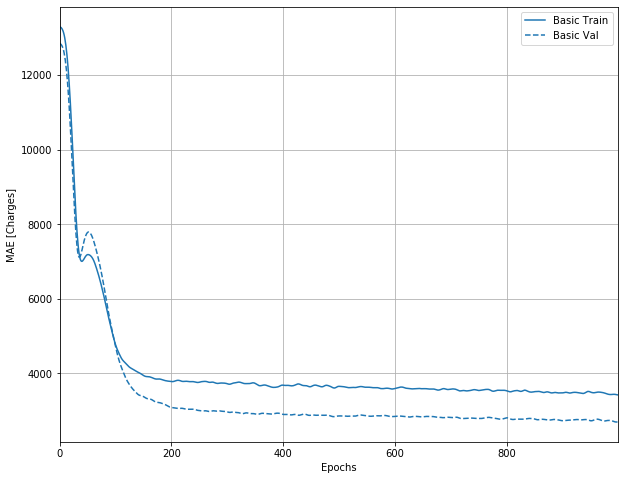

In [81]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

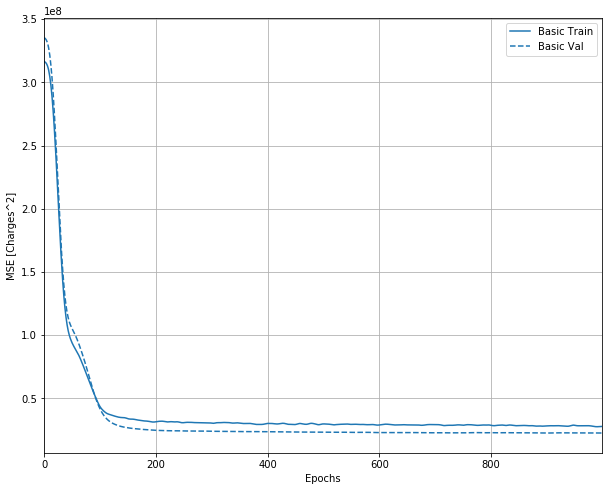

In [82]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

### Plotting scatter plot for actual and predicted charges

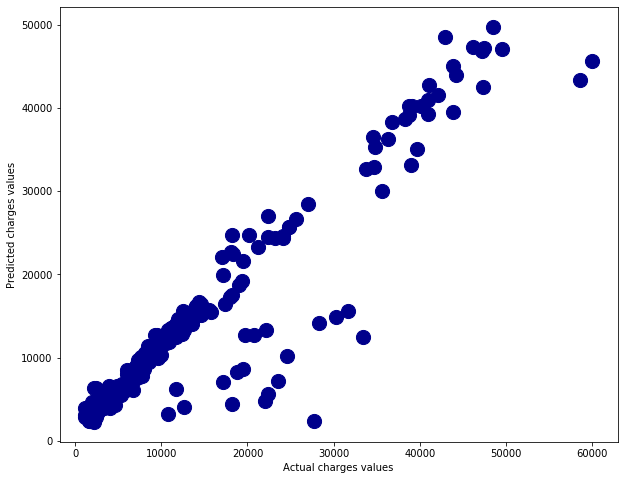

In [83]:
y_pred = model_relu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [88]:
r2_score(y_test, y_pred)

0.854837846078773

### Building model with relu activation function

In [47]:
def build_model():
    model = tf.keras.Sequential([
        layers.Dense(32, activation='elu', input_shape=[len(x_train.keys())]),
        layers.Dropout(0.2),
        layers.Dense(64, activation='elu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [48]:
model_elu_64 = build_model()

model_elu_64.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


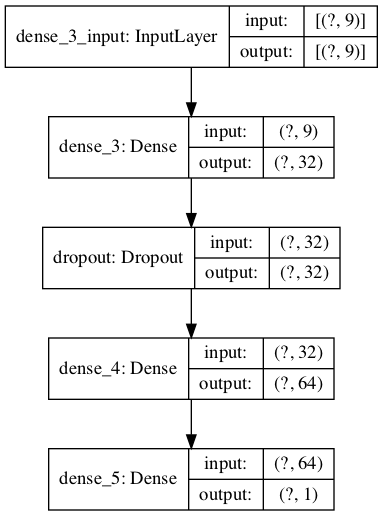

In [49]:
keras.utils.plot_model(model_elu_64, 'model_elu_64_shapes.png', show_shapes=True)

### Training model (build with elu activation function and dropout)

In [50]:
training_hist= model_elu_64.fit(x_train, 
                                y_train,
                                epochs = n_epochs, 
                                validation_split = 0.2, 
                                verbose = False,
                                callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317051840.0000,  mae:13317.5928,  mse:317051840.0000,  val_loss:336085522.5421,  val_mae:12876.6709,  val_mse:336085536.0000,  
....................................................................................................
Epoch: 100, loss:42636992.1495,  mae:4711.2363,  mse:42636988.0000,  val_loss:41399379.6636,  val_mae:4726.2559,  val_mse:41399376.0000,  
....................................................................................................
Epoch: 200, loss:30923836.0187,  mae:3675.3054,  mse:30923838.0000,  val_loss:24673528.7103,  val_mae:3062.7361,  val_mse:24673528.0000,  
....................................................................................................
Epoch: 300, loss:30972676.6168,  mae:3801.9377,  mse:30972676.0000,  val_loss:23939952.6355,  val_mae:2958.2334,  val_mse:23939952.0000,  
....................................................................................................
Epoch: 400, loss:31169733.3084,  ma

In [51]:
training_hist_df = pd.DataFrame(training_hist.history)

training_hist_df['epoch'] = training_hist.epoch

training_hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.812090e+07,3477.025391,28120894.0,2.261751e+07,2636.547852,22617514.0,995
996,2.722891e+07,3346.703613,27228916.0,2.259926e+07,2700.538086,22599262.0,996
997,2.769276e+07,3449.484619,27692756.0,2.257609e+07,2712.402344,22576090.0,997
998,2.762454e+07,3428.845215,27624538.0,2.256319e+07,2686.415771,22563190.0,998
999,2.833220e+07,3395.688721,28332198.0,2.261249e+07,2731.766846,22612492.0,999


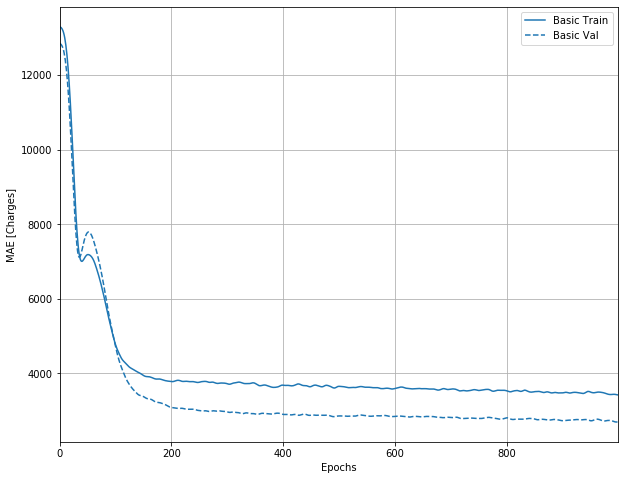

In [84]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mae")

plt.ylabel('MAE [Charges]')
plt.show()

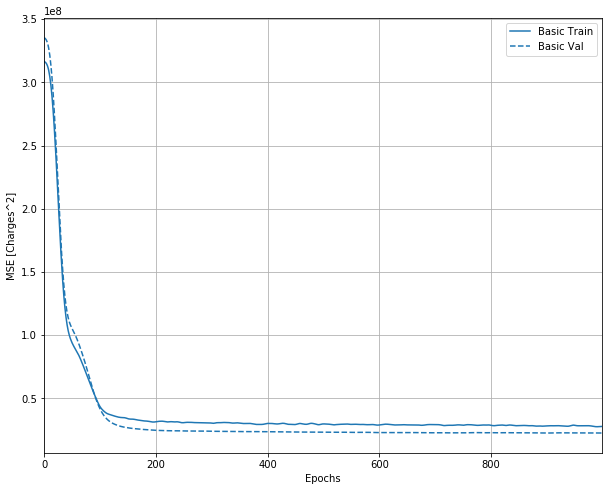

In [85]:
plt.figure(figsize=(10, 8))

plotter.plot({'Basic': training_hist}, metric = "mse")

plt.ylabel('MSE [Charges^2]')
plt.show()

In [54]:
model_elu_64.evaluate(x_test, y_test)

268/268 [==============================] - 0s 102us/sample - loss: 21669900.0000 - mae: 2823.3799 - mse: 21669900.0000


[21669900.0, 2823.38, 21669900.0]

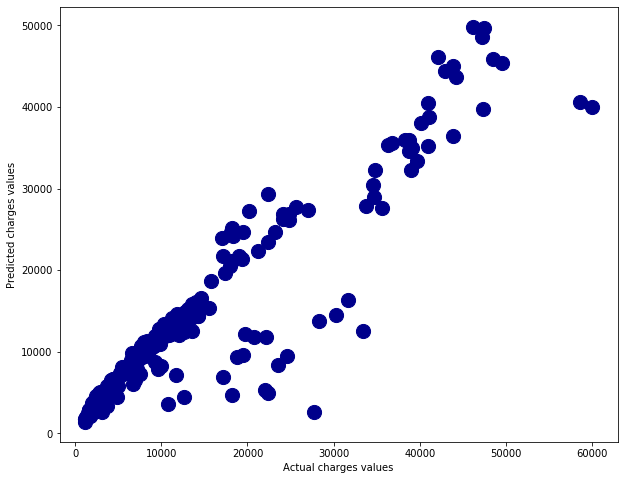

In [86]:
y_pred = model_elu_64.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [87]:
r2_score(y_test, y_pred)

0.854837846078773

### Building model with Earlystopping callback

In [57]:
model_relu_with_ES = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

training_history = model_relu_with_ES.fit(x_train, 
                                       y_train, 
                                       epochs=n_epochs, 
                                       validation_split = 0.2, 
                                       verbose=False, 
                                       callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:317050837.8318,  mae:13317.6074,  mse:317050848.0000,  val_loss:336086176.8972,  val_mae:12876.6504,  val_mse:336086176.0000,  
....................................................................................................
Epoch: 100, loss:40018230.3738,  mae:4503.7358,  mse:40018232.0000,  val_loss:37999307.9626,  val_mae:4476.0312,  val_mse:37999308.0000,  
....................................................................................................
Epoch: 200, loss:32853301.7664,  mae:3822.6609,  mse:32853300.0000,  val_loss:24592829.6449,  val_mae:3060.6631,  val_mse:24592830.0000,  
...........................

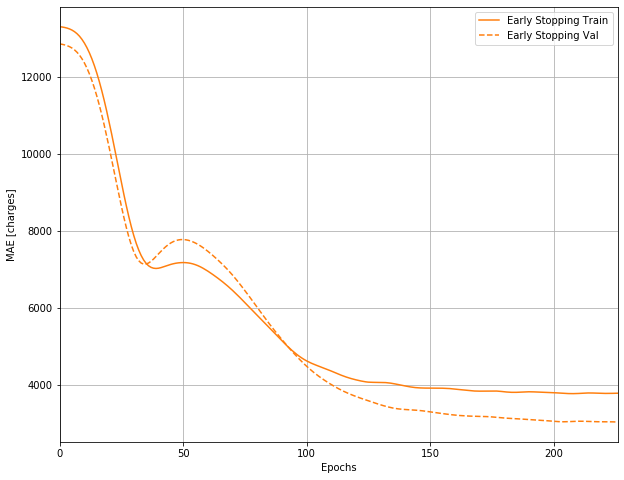

In [90]:
plt.figure(figsize=(10, 8))

plotter.plot({'Early Stopping': training_history}, metric = "mae")

plt.ylabel('MAE [charges]')
plt.show()

In [59]:
model_relu_with_ES.evaluate(x_test, y_test)

268/268 [==============================] - 0s 113us/sample - loss: 24273928.0000 - mae: 3093.7209 - mse: 24273932.0000


[24273928.0, 3093.721, 24273932.0]

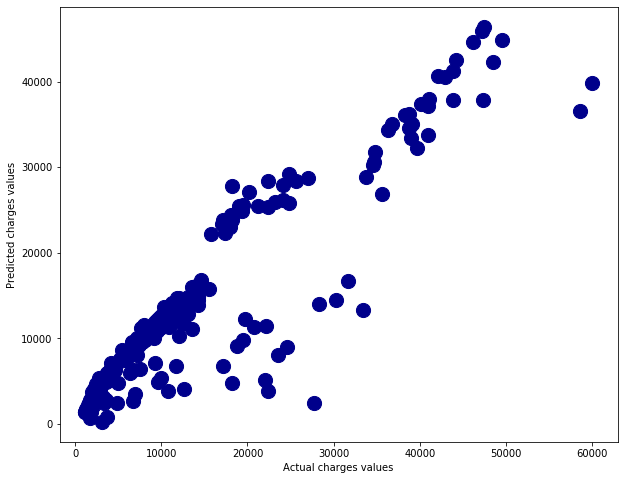

In [91]:
y_pred = model_relu_with_ES.predict(x_test).flatten()

plt.figure(figsize=(10, 8))

plt.scatter(y_test, y_pred, s=200, c='darkblue')

plt.xlabel('Actual charges values')
plt.ylabel('Predicted charges values')
plt.show()

In [61]:
r2_score(y_test, y_pred)

0.8373940027440104

In [62]:
model_relu_with_ES.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights")

In [64]:
!ls my_models/

checkpoint                          relu_64_weights.data-00000-of-00001
relu_64_config.json                 relu_64_weights.h5
relu_64_config_weights              relu_64_weights.index


In [65]:
model_relu_with_ES.save_weights("./my_models/relu_64_weights.h5", save_format="h5")

In [66]:
!ls my_models/

checkpoint                          relu_64_weights.data-00000-of-00001
relu_64_config.json                 relu_64_weights.h5
relu_64_config_weights              relu_64_weights.index


In [67]:
relu_64_json = model_relu_with_ES.to_json()

pprint.pprint(json.loads(relu_64_json))

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'seed': None}},
                                   'kernel_regularizer': None,
                                   'name': 'dense_6',
                               

In [73]:
with open('./my_models/relu_64_config.json', 'w') as outfile: 
    
    outfile.write(relu_64_json) 

In [74]:
!cat my_models/relu_64_config.json

{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "Dense", "config": {"name": "dense_6", "trainable": true, "batch_input_shape": [null, 9], "dtype": "float32", "units": 32, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dropout", "config": {"name": "dropout_1", "trainable": true, "dtype": "float32", "rate": 0.2, "noise_shape": null, "seed": null}}, {"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "dtype": "float32", "units": 64, "activation": "elu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regu

### Saving entire model

In [70]:
model_relu_with_ES.save("./my_models/relu_64_config_weights")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./my_models/relu_64_config_weights/assets


In [71]:
!ls my_models/relu_64_config_weights 

assets         saved_model.pb variables
